We will first import all the relevant libraries, including some datetime classes and functions. Then, import the sampledata.csv file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import datetime,timedelta


In [2]:
df=pd.read_csv('sampledata.csv')

Some of the issues noticed first hand: there are many variations of how the province variable is recorded, the net_worth column is text data (due to $ and , symbols), the first and last name aren't split, and we have some missing values in the province column.

In [3]:
df.head()


,customer_id,name,province,birth_date,net_worth
0,1,Audrey Thomas,Ont.,"December 27, 1992","$92,887.00"
1,2,Byron Tucker,Ontario,"May 1, 1995","$50,000.00"
2,3,Melissa Watson,Ontario,"August 11, 1996","$447,015.00"
3,4,Alisa Holmes,ON,"October 13, 1984","$294,583.00"
4,5,Clark Crawford,BC,"April 20, 2006","$24,873.00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  50 non-null     int64 
 1   name         50 non-null     object
 2   province     42 non-null     object
 3   birth_date   50 non-null     object
 4   net_worth    50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


The first thing we will do is split up the first and last name. We can use str.split() or str.rsplit() for this.

str.split() will split a string starting on the left hand side, while rsplit() will do so starting on the right hand side. The 'n' parameter in this function tells it how many times to split (once, twice, and so on). In our case, we only need to split once, and we will use rsplit(). Why? Bacause in cases where we have middle names, we are going to record these as part of the first name. You need to watch out for and determine how to treat common name issues, like hyphenated names, middle initials, middle names, 2 last names, and so on.

Finally, the 'expand' argument in this function tells it to create two new columns - one for the first name and one for the last.

In [5]:
df2 = df['name'].str.rsplit(n=1, expand=True)

In [6]:
df2.head()

,0,1
0,Audrey,Thomas
1,Byron,Tucker
2,Melissa,Watson
3,Alisa,Holmes
4,Clark,Crawford


We can use the join() function to combine our original dataframe with the two new columns. You can also achieve the same result using concat(). I will also rename the columns.

In [7]:
df=df.join(df2)

In [8]:
df.rename(columns={0:'first_name',1:'last_name'}, inplace=True)

Time to deal with the province issues. I'm going to create a dictionary which maps each unique value to the value I actually want.

In [9]:
df['province'].unique()

array(['Ont.', 'Ontario', 'ON', 'BC', 'British Columbia', 'B.C.',
       'Manitoba', 'MB', 'M.B', 'M.B.', 'mb', 'Nfld', 'Newfoundland',
       'NF', 'QB', 'Quebec', 'Q.B.', nan, 'Bc', 'Ontaario', 'Ont',
       'Nunavut', 'Yukon', 'The Yukon', 'Sask', 'Saskatchewan', 'SK',
       'Yukon Territory', 'Toronto', 'Canada', 'PEI', 'Matitoba'],
      dtype=object)

In [10]:
dictionary={'Ont.':'ON', 'Ontario':'ON', 'British Columbia':'BC', 'B.C.':'BC',
       'Manitoba':'MB', 'M.B':'MB', 'M.B.':'MB', 'mb':'MB', 'Nfld':'NF', 'Newfoundland':'NF', 'Quebec':'QB', 
            'Q.B.':'QB', 'Bc':'BC', 'Ontaario':'ON', 'Ont':'ON',
       'Nunavut':'NV', 'Yukon':'YK', 'The Yukon':'YK', 'Sask':'SK', 'Saskatchewan':'SK',
       'Yukon Territory':'YK', 'Toronto':'ON', 'Canada':'ON', 'Matitoba':'MB'}

Then, I'm going to use the replace() function to replace the values in the province column with those from the dictionary. Finally, I'll just fill in the missing values with 'other'

In [11]:
df.replace({'province':dictionary}, inplace=True)

In [12]:
df['province'].fillna(value='Other',inplace=True)

In [13]:
df.head(2)

,customer_id,name,province,birth_date,net_worth,first_name,last_name
0,1,Audrey Thomas,ON,"December 27, 1992","$92,887.00",Audrey,Thomas
1,2,Byron Tucker,ON,"May 1, 1995","$50,000.00",Byron,Tucker


Time to clean that pesky dollar data! This should be easy - use the str.replace() method to get rid of $ and , symbols. Also, don't forget to change the type from string to float. You should use astype() for this.

In [14]:
df['net_worth']=df['net_worth'].str.replace('$','',regex=True)
df['net_worth']=df['net_worth'].str.replace(',','',regex=True)

In [15]:
df['net_worth']=df['net_worth'].astype(float)

In [16]:
df.head()

,customer_id,name,province,birth_date,net_worth,first_name,last_name
0,1,Audrey Thomas,ON,"December 27, 1992",92887.0,Audrey,Thomas
1,2,Byron Tucker,ON,"May 1, 1995",50000.0,Byron,Tucker
2,3,Melissa Watson,ON,"August 11, 1996",447015.0,Melissa,Watson
3,4,Alisa Holmes,ON,"October 13, 1984",294583.0,Alisa,Holmes
4,5,Clark Crawford,BC,"April 20, 2006",24873.0,Clark,Crawford


Now we can use the to_datetime() function to fix the format of our birth date data. This will help us calculate the age.

In [17]:
df['birth_date']=pd.to_datetime(df['birth_date'])

In [18]:
df.head()

,customer_id,name,province,birth_date,net_worth,first_name,last_name
0,1,Audrey Thomas,ON,1992-12-27,92887.0,Audrey,Thomas
1,2,Byron Tucker,ON,1995-05-01,50000.0,Byron,Tucker
2,3,Melissa Watson,ON,1996-08-11,447015.0,Melissa,Watson
3,4,Alisa Holmes,ON,1984-10-13,294583.0,Alisa,Holmes
4,5,Clark Crawford,BC,2006-04-20,24873.0,Clark,Crawford


We also should import the data class from datetime, which will allow us pull out today's date, and subtract the birth date from it to calculate age.

In [19]:
from datetime import date

In [21]:
today=date.today()

In [22]:
today

datetime.date(2020, 9, 1)

In [23]:
df['age'] = (today.year - df['birth_date'].dt.year)

In [24]:
df.head()

,customer_id,name,province,birth_date,net_worth,first_name,last_name,age
0,1,Audrey Thomas,ON,1992-12-27,92887.0,Audrey,Thomas,28
1,2,Byron Tucker,ON,1995-05-01,50000.0,Byron,Tucker,25
2,3,Melissa Watson,ON,1996-08-11,447015.0,Melissa,Watson,24
3,4,Alisa Holmes,ON,1984-10-13,294583.0,Alisa,Holmes,36
4,5,Clark Crawford,BC,2006-04-20,24873.0,Clark,Crawford,14


Now we can do exploratory analysis, using groupby and pivot_table, and filtering mechanisms.

In [25]:
data=df.groupby(['province'])['net_worth'].mean()

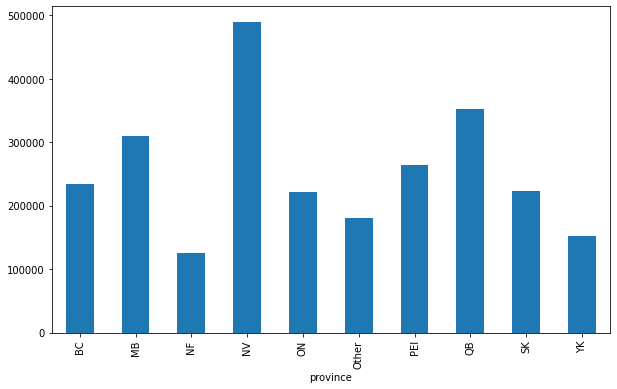

In [26]:
data.plot(kind='bar',figsize=(10,6))

In [27]:
age_data = df.groupby(['age'])['net_worth'].mean()

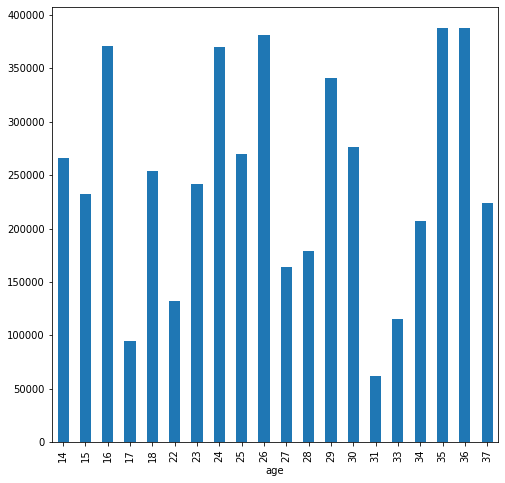

In [28]:
age_data.plot(kind='bar',figsize=(8,8))

In [29]:
df.head()

,customer_id,name,province,birth_date,net_worth,first_name,last_name,age
0,1,Audrey Thomas,ON,1992-12-27,92887.0,Audrey,Thomas,28
1,2,Byron Tucker,ON,1995-05-01,50000.0,Byron,Tucker,25
2,3,Melissa Watson,ON,1996-08-11,447015.0,Melissa,Watson,24
3,4,Alisa Holmes,ON,1984-10-13,294583.0,Alisa,Holmes,36
4,5,Clark Crawford,BC,2006-04-20,24873.0,Clark,Crawford,14


In [30]:
df.groupby('province')[['net_worth','age']].aggregate(['mean','sum'])

net_worth                   age     
                   mean        sum       mean  sum
province                                          
BC        233830.200000  1169151.0  27.200000  136
MB        310512.714286  2173589.0  19.571429  137
NF        126147.666667   378443.0  30.000000   90
NV        489700.000000   489700.0  25.000000   25
ON        221115.700000  2211157.0  28.700000  287
Other     180635.125000  1445081.0  22.375000  179
PEI       264235.750000  1056943.0  24.250000   97
QB        352050.333333  2112302.0  22.333333  134
SK        223038.000000   669114.0  25.666667   77
YK        152673.333333   458020.0  30.000000   90

You can filter using comparison operators or the isin() function to look for specific things. Here is an example of filtering all customers who live in Ontario and have the last name Thomas or Tucker.

In [31]:
df[(df['province'] == 'ON') & (df['last_name'].isin(['Thomas','Tucker']))]

,customer_id,name,province,birth_date,net_worth,first_name,last_name,age
0,1,Audrey Thomas,ON,1992-12-27,92887.0,Audrey,Thomas,28
1,2,Byron Tucker,ON,1995-05-01,50000.0,Byron,Tucker,25


Here is another example where we are looking for customers in Ontario with net worths between 30,000 and 500,000.

In [32]:
df[(df['province'] == 'ON') & (df['net_worth'].isin(range(30000,500000)))]

,customer_id,name,province,birth_date,net_worth,first_name,last_name,age
0,1,Audrey Thomas,ON,1992-12-27,92887.0,Audrey,Thomas,28
1,2,Byron Tucker,ON,1995-05-01,50000.0,Byron,Tucker,25
2,3,Melissa Watson,ON,1996-08-11,447015.0,Melissa,Watson,24
3,4,Alisa Holmes,ON,1984-10-13,294583.0,Alisa,Holmes,36
26,27,Oliver Gibson,ON,1986-01-03,39830.0,Oliver,Gibson,34
27,28,Sofia Taylor,ON,1983-05-22,414431.0,Sofia,Taylor,37
28,29,Edwin Riley,ON,2004-12-20,203535.0,Edwin,Riley,16
49,50,Jared Cooper,ON,1998-11-23,131816.0,Jared,Cooper,22


In [33]:
df[(df['province'].isin(['ON','BC'])) & (df['net_worth'].isin(range(30000,500000)))]

,customer_id,name,province,birth_date,net_worth,first_name,last_name,age
0,1,Audrey Thomas,ON,1992-12-27,92887.0,Audrey,Thomas,28
1,2,Byron Tucker,ON,1995-05-01,50000.0,Byron,Tucker,25
2,3,Melissa Watson,ON,1996-08-11,447015.0,Melissa,Watson,24
3,4,Alisa Holmes,ON,1984-10-13,294583.0,Alisa,Holmes,36
5,6,Ellia Bailey,BC,1984-03-18,487206.0,Ellia,Bailey,36
7,8,Brianna Brown,BC,1993-12-09,267990.0,Brianna,Brown,27
25,26,Luke Foster,BC,1984-06-20,380283.0,Luke,Foster,36
26,27,Oliver Gibson,ON,1986-01-03,39830.0,Oliver,Gibson,34
27,28,Sofia Taylor,ON,1983-05-22,414431.0,Sofia,Taylor,37
28,29,Edwin Riley,ON,2004-12-20,203535.0,Edwin,Riley,16


The pivot_table() function and groupby() functions will yield similar results.

In [34]:
pivot=pd.pivot_table(df, values=['net_worth'], index=['province','age'], aggfunc=['sum','mean'])

In [35]:
pivot

sum      mean
             net_worth net_worth
province age                    
BC       14    24873.0   24873.0
         23     8799.0    8799.0
         27   267990.0  267990.0
         36   867489.0  433744.5
MB       14   551119.0  551119.0
         15   461855.0  461855.0
         16   463394.0  463394.0
         17    39601.0   19800.5
         23   269681.0  269681.0
         35   387939.0  387939.0
NF       26   247003.0  247003.0
         30     3830.0    3830.0
         34   127610.0  127610.0
NV       25   489700.0  489700.0
ON       16   203535.0  203535.0
         22   131816.0  131816.0
         24   447015.0  447015.0
         25    50000.0   50000.0
         28    92887.0   92887.0
         31     9829.0    9829.0
         34   567061.0  283530.5
         36   294583.0  294583.0
         37   414431.0  414431.0
Other    14     7462.0    7462.0
         15     3400.0    3400.0
         17   191766.0  191766.0
         18   504148.0  504148.0
         23   404105.0  404105.0
         24   187391.0  187391.0
         31   113166.0  113166.0
         37    33643.0   33643.0
PEI      17   163462.0  163462.0
         23   285192.0  285192.0
         27    59857.0   59857.0
         30   548432.0  548432.0
QB       14   481559.0  481559.0
         16   445896.0  445896.0
         18     3837.0    3837.0
         24   475566.0  475566.0
         28   441076.0  441076.0
         34   264368.0  264368.0
SK       17    78726.0   78726.0
         26   515912.0  515912.0
         34    74476.0   74476.0
YK       28     1778.0    1778.0
         29   341299.0  341299.0
         33   114943.0  114943.0

In [36]:
data=df.groupby(['province','age'])['net_worth'].aggregate(['mean','sum'])

In [37]:
data

mean       sum
province age                    
BC       14    24873.0   24873.0
         23     8799.0    8799.0
         27   267990.0  267990.0
         36   433744.5  867489.0
MB       14   551119.0  551119.0
         15   461855.0  461855.0
         16   463394.0  463394.0
         17    19800.5   39601.0
         23   269681.0  269681.0
         35   387939.0  387939.0
NF       26   247003.0  247003.0
         30     3830.0    3830.0
         34   127610.0  127610.0
NV       25   489700.0  489700.0
ON       16   203535.0  203535.0
         22   131816.0  131816.0
         24   447015.0  447015.0
         25    50000.0   50000.0
         28    92887.0   92887.0
         31     9829.0    9829.0
         34   283530.5  567061.0
         36   294583.0  294583.0
         37   414431.0  414431.0
Other    14     7462.0    7462.0
         15     3400.0    3400.0
         17   191766.0  191766.0
         18   504148.0  504148.0
         23   404105.0  404105.0
         24   187391.0  187391.0
         31   113166.0  113166.0
         37    33643.0   33643.0
PEI      17   163462.0  163462.0
         23   285192.0  285192.0
         27    59857.0   59857.0
         30   548432.0  548432.0
QB       14   481559.0  481559.0
         16   445896.0  445896.0
         18     3837.0    3837.0
         24   475566.0  475566.0
         28   441076.0  441076.0
         34   264368.0  264368.0
SK       17    78726.0   78726.0
         26   515912.0  515912.0
         34    74476.0   74476.0
YK       28     1778.0    1778.0
         29   341299.0  341299.0
         33   114943.0  114943.0